In [1]:
import pandas as pd 
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
import sys 
sys.path.append("../lib")
from figparams import *
plt.rcParams.update(rc_params)

In [3]:
data = h5py.File('../data/dataFigure1.h5', 'r')
nsrcs8 = data['nsrcs8'][:]
nsrcs6 = data['nsrcs6'][:]
nsrcs4 = data['nsrcs4'][:]
data.close()

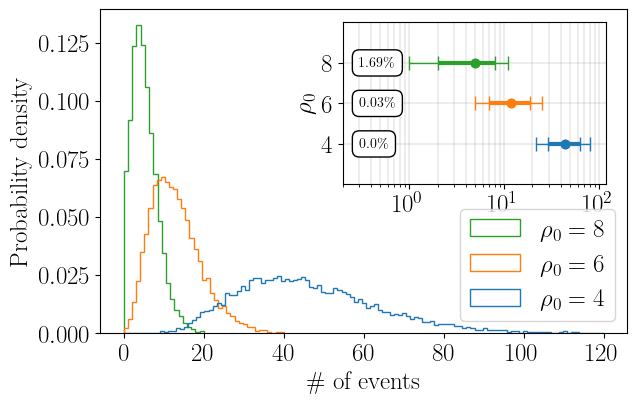

In [4]:
fig = plt.figure(1, figsize=rect_size)
plt.hist(nsrcs8, bins=np.linspace(0,20,20), histtype='step', label='$\\rho_0 = 8$', color="C2", density=True)
plt.hist(nsrcs6, bins=np.linspace(0,40,40), histtype='step', label='$\\rho_0 = 6$', color="C1", density=True)
plt.hist(nsrcs4, bins=np.linspace(0,120,120), histtype='step', label='$\\rho_0 = 4$',color="C0", density=True)

plt.legend(loc='lower right')
plt.xlabel("\# of events")
plt.ylabel("Probability density")

median8 = np.median(nsrcs8)
median6 = np.median(nsrcs6)
median4 = np.median(nsrcs4)

median8_minus1 = np.percentile(nsrcs8, 16)
median8_plus1 = np.percentile(nsrcs8, 84)
median6_minus1 = np.percentile(nsrcs6, 16)
median6_plus1 = np.percentile(nsrcs6, 84)
median4_minus1 = np.percentile(nsrcs4, 16)
median4_plus1 = np.percentile(nsrcs4, 84)

median8_minus2 = np.percentile(nsrcs8, 5.0)
median8_plus2 = np.percentile(nsrcs8, 95.0)
median6_minus2 = np.percentile(nsrcs6, 5.0)
median6_plus2 = np.percentile(nsrcs6, 95.0)
median4_minus2 = np.percentile(nsrcs4, 5.0)
median4_plus2 = np.percentile(nsrcs4, 95.0)

ax = plt.gca()
axin = ax.inset_axes([0.46, 0.46, 0.5, 0.5])

axin.errorbar(median8, 3, xerr=[[median8-median8_minus1], [median8_plus1-median8]], fmt='o', label='SNR > 8', color='C2', lw=3, solid_capstyle='projecting',capsize=5)
axin.errorbar(median6, 2, xerr=[[median6-median6_minus1], [median6_plus1-median6]], fmt='o', label='SNR > 6', color='C1',lw=3, solid_capstyle='projecting',capsize=5)
axin.errorbar(median4,1, xerr=[[median4-median4_minus1], [median4_plus1-median4]], fmt='o', label='SNR > 4', color='C0', lw=3, solid_capstyle='projecting',capsize=5)
eb=axin.errorbar(median8, 3, xerr=[[median8-median8_minus2], [median8_plus2-median8]], fmt='o', color='C2', lw=1, solid_capstyle='projecting',capsize=5)
eb=axin.errorbar(median6, 2, xerr=[[median6-median6_minus2], [median6_plus2-median6]], fmt='o', color='C1', lw=1, solid_capstyle='projecting',capsize=5)
eb=axin.errorbar(median4,1, xerr=[[median4-median4_minus2], [median4_plus2-median4]], fmt='o', color='C0', lw=1, solid_capstyle='projecting',capsize=5)

val=np.round(100-np.count_nonzero(nsrcs8)/len(nsrcs8)*100, 2)
axin.text(0.3, 3, f"$\, {val} \% \,$", color='k', fontsize=10, ha='left', va='center',
             zorder=10, bbox=dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.5'))

val=np.round(100-np.count_nonzero(nsrcs6)/len(nsrcs6)*100, 2)
axin.text(0.3, 2, f"$\, {val} \% \,$", color='k', fontsize=10, ha='left', va='center',
             zorder=10, bbox=dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.5'))

val=np.round(100-np.count_nonzero(nsrcs4)/len(nsrcs4)*100, 5)
axin.text(0.3, 1, f"$\, {val} \% \,$", color='k', fontsize=10, ha='left', va='center',
             zorder=10, bbox=dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.5'))

axin.set_yticks([1,2,3], ['$4$', '$6$', '$8$'])
axin.set_ylabel("$\\rho_0$")
axin.grid(which='both', color='grey', linewidth=0.2)
axin.set_xscale('log')
axin.set_xlim(0.2, 120)
axin.set_ylim(0,4)
plt.savefig('../plots/Figure1.pdf', bbox_inches='tight')
plt.show()